In [51]:
import random
import numpy as np
import networkx as nx 
from dijkstar import Graph, find_path
from ipywidgets import IntProgress 
from IPython.display import display

In [52]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight, density):
  graph = np.ones((nb_vertex, nb_vertex)) * np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < density:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      converted_graph_i = np.where(node_list == i)[0][0]
      converted_graph_j = np.where(node_list == j)[0][0]
      complete_graph[converted_graph_i][converted_graph_j] = distance
      all_paths[(converted_graph_i, converted_graph_j)] = path
  return complete_graph, all_paths

def get_random_vertex(size, nb_vertex):
  random_vertex = []
  all_vertex = np.array(range(size))
  for _ in range(nb_vertex):
    value = random.choice(all_vertex)
    random_vertex.append(value)
    all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
  return np.array(random_vertex)

def generate_interval():
  interval = random.choice(range(1,4))
  shift = random.choice(range(0, 11-interval))
  return(shift*60, (shift+interval)*60)

def generate_instance(nb_vertex_matrix, min_weight, max_weight, density, random_vertex):
  graph = generate_instance_matrix(nb_vertex_matrix, min_weight, max_weight, density)
  complete_graph, all_paths = get_complete_graph(graph, random_vertex)
  return graph, complete_graph, all_paths

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

def is_path_in_interval(path, complete_graph, interval, vertex):
  weight = 0
  for i in range(np.where(np.array(path) == vertex)[0][0]):
    weight += complete_graph[path[i]][path[i+1]]
  if weight >= interval[0] and weight <= interval[1]:
    return True
  else:
    return False

def plot_graph(path, graph, all_vertex, all_verticies, start_vertex):
  for i in range(len(graph) - 1):
    for j in range(i + 1, len(graph)):
      if graph[i, j] != np.inf:
        x = [all_vertex[i][0], all_vertex[j][0]]
        y = [all_vertex[i][1], all_vertex[j][1]]
        plt.plot(x, y, color = "gray")
  for i in range(len(path) - 1):
    x = [all_vertex[path[i]][0], all_vertex[path[i+1]][0]]
    y = [all_vertex[path[i]][1], all_vertex[path[i+1]][1]]
    plt.plot(x, y, color = "red")
  for i in range(len(all_vertex)):
    if(i == start_vertex):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "blue")
    elif(i in all_verticies):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "green")
    else: 
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "gray")
    plt.text(all_vertex[i][0] - 10, all_vertex[i][1] + 20, str(i))
  plt.show()

def generate_neighbours(path, complete_graph, interval, vertex):
  neighbours = []
  for i in range(len(path)):
    for j in range(i + 1, len(path)-1):
      new_neighbour = path.copy()

      new_neighbour[i] = path[j] 
      new_neighbour[j] = path[i]
      
      if is_path_in_interval(new_neighbour, complete_graph, interval, vertex) and new_neighbour[0] == new_neighbour[-1]:
        neighbours.append(new_neighbour)
  return neighbours

def generate_random_path(nb_vertex, start_vertex):
  path = np.arange(nb_vertex)
  path = np.delete(path, np.where(path == start_vertex))
  np.random.shuffle(path)
  path = np.append(path, start_vertex)
  path = np.insert(path, 0, start_vertex)
  return path



In [53]:
import pickle
with open("data_medium.pickle", "rb") as file:
  data = pickle.load(file)


graph = data["graph"]
complete_graph = data["complete_graph"]
all_paths = data["all_paths"]
vertices_list = data["vertices_list"]
start_vertex = data["start_vertex"]
start_vertex_index = data["start_vertex_index"]
interval_vertex = data["interval_vertex"]
interval_vertex_index = data["interval_vertex_index"]
interval = data["interval"]
all_vertex = data["all_vertex"]


path = generate_random_path(len(vertices_list), start_vertex_index)

In [54]:
# generate the neighbours of a path

neighbours = generate_neighbours(path, complete_graph, interval, interval_vertex_index)


-----------------
-----------------
1 Optimal 7597.748779677282
route_plan [[(0, 49), (49, 67), (67, 73), (73, 76), (76, 60), (60, 20), (20, 43), (43, 46), (46, 90), (90, 37), (37, 19), (19, 50), (50, 48), (48, 35), (35, 96), (96, 54), (54, 15), (15, 32), (32, 80), (80, 82), (82, 4), (4, 28), (28, 86), (86, 52), (52, 30), (30, 85), (85, 75), (75, 64), (64, 58), (58, 10), (10, 79), (79, 66), (66, 22), (22, 84), (84, 72), (72, 87), (87, 40), (40, 8), (8, 61), (61, 36), (36, 95), (95, 1), (1, 88), (88, 14), (14, 21), (21, 16), (16, 12), (12, 27), (27, 63), (63, 97), (97, 13), (13, 6), (6, 33), (33, 31), (31, 57), (57, 41), (41, 81), (81, 99), (99, 68), (68, 65), (65, 24), (24, 77), (77, 34), (34, 38), (38, 45), (45, 25), (25, 47), (47, 29), (29, 44), (44, 5), (5, 71), (71, 91), (91, 39), (39, 92), (92, 98), (98, 62), (62, 53), (53, 3), (3, 18), (18, 9), (9, 83), (83, 70), (70, 78), (78, 93), (93, 94), (94, 55), (55, 59), (59, 56), (56, 2), (2, 23), (23, 51), (51, 74), (74, 26), (26, 11), 

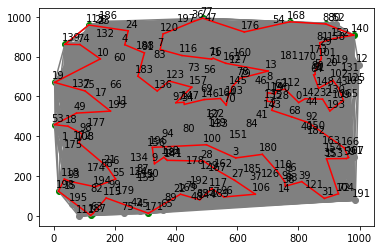

In [57]:
#import libraries
%matplotlib inline
import pulp
import pandas as pd
from matplotlib import pyplot as plt
import time
import copy


# this function find all the subtour in the LP solution.
def get_plan(r0):
    r=copy.copy(r0)
    route = []
    while len(r) != 0:
        plan = [r[0]]
        del (r[0])
        l = 0
        while len(plan) > l:
            l = len(plan)
            for i, j in enumerate(r):
                if plan[-1][1] == j[0]:
                    plan.append(j)
                    del (r[i])
        route.append(plan)
    return(route)


def Simplex(complete_graph):

    no_of_locs = len(complete_graph)


    dis_mat= complete_graph

    start_t_1=time.time()
    model=pulp.LpProblem('tsp',pulp.LpMinimize)
    #define variable
    x=pulp.LpVariable.dicts("x",((i,j) for i in range(no_of_locs) \
                                    for j in range(no_of_locs)),\
                            cat='Binary')
    #set objective
    model+=pulp.lpSum(dis_mat[i][j]* x[i,j] for i in range(no_of_locs) \
                        for j in range(no_of_locs))
    # st constraints
    for i in range(no_of_locs):
        model+=x[i,i]==0
        model+=pulp.lpSum(x[i,j] for j in range(no_of_locs))==1
        model += pulp.lpSum(x[j, i] for j in range(no_of_locs)) == 1
        
        
    status=model.solve()



    route=[(i,j) for i in range(no_of_locs) \
            for j in range(no_of_locs) if pulp.value(x[i,j])==1]
    route_plan=get_plan(route)
    subtour=[]

    while len(route_plan)!=1:
        for i in range(len(route_plan)):
            model+=pulp.lpSum(x[route_plan[i][j][0],route_plan[i][j][1]]\
                                for j in range(len(route_plan[i])))<=\
                                len(route_plan[i])-1


        status=model.solve()
        route = [(i, j) for i in range(no_of_locs) \
                    for j in range(no_of_locs) if pulp.value(x[i, j]) == 1]
        route_plan = get_plan(route)
        
        subtour.append(len(route_plan))

    print("-----------------")
    print(status,pulp.LpStatus[status],pulp.value(model.objective))
    print("route_plan",route_plan)

    out = [item for t in route_plan[0] for item in t]
    liste_out = list(dict.fromkeys(out))
    liste_out.insert(len(liste_out), liste_out[0])
    print("liste_route_plan",liste_out)
    


    print("no. of times LP model is solved = ",len(subtour))
    print("subtour log (no. of subtours in each solution))",subtour)
    print("Time taken by DFJ formulation = ", time.time()-start_t_1)

    return liste_out,pulp.value(model.objective)

print("-----------------")
liste_out,distance_obj = Simplex(complete_graph)
"""while is_path_in_interval(liste_out, complete_graph, interval, interval_vertex_index) != True:
        print("path is not in interval")
        liste_out,distance_obj = Simplex(complete_graph)"""

complete_path = get_complete_path(liste_out, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)




In [ ]:
nb_iterations=10000 #Dans la boucle while de la boucle principale
T0 = 30000 #Température de départ
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement


In [ ]:
def distance_tot(matrice,path_matrix):
    distance_tot = 0
    ind = 2
    points = [0,0]
    for i in range(len(path_matrix)):
        if i == 0:
            points = path_matrix[0:2]
            distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
        else:
            if (ind <= len(matrice)):
                points = path_matrix[ind-1:ind+1]
                distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
                ind += 1
    return distance_tot

print(distance_tot(complete_graph,path))


27179.03756982944


In [ ]:

bornes = []
bone_inf = distance_obj

def recuit_simule_matrix(matrix,path,temp):
    bar = IntProgress(min=0, max=nb_iterations, layout={"width" : "100%"})
    display(bar)
    i_tab = []
    T_Tab = []
    distance_tab = []

    distance = distance_tot(matrix,path)
    solution = np.copy(path)
    i = 0
    T=temp

    while T>Tmin and i<nb_iterations:
        i_tab.append(i)
        T_Tab.append(T)
        distance_tab.append(distance)
        i+=1

        #Loi de refroidissement
        T = temp * np.exp(-i/tau)

        solution_voisine = neighbours[np.random.randint(0, len(neighbours))]
        """while is_path_in_interval(solution_voisine, matrix, interval, 95) == False:
            solution_voisine = neighbours[np.random.randint(0, len(neighbours))]"""

        #Création de la nouvelle solution proche de la precedente
        

        #Comparaison des deux valeurs
        difference = distance_tot(matrix,solution) - distance_tot(matrix,solution_voisine)

        # Si la nouvelle solution est meilleure, on la prend
        if difference > 0:
            solution = solution_voisine
            distance = distance_tot(matrix,solution_voisine)
        # Sinon, on prend la solution actuelle
        else:
            if np.random.uniform() > np.exp(-difference/T): #on accepte la solution avec une certaine probabilité. 
                solution=solution_voisine
                distance=distance_tot(matrix,solution_voisine)
        bar.value += 1
    bar.close()
    return solution,distance,i_tab,T_Tab,distance_tab
    

solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path,T0)


# Make a multistart of recuit_simule_matrix
for _ in range (10):  
    
    path = generate_random_path(len(vertices_list), start_vertex_index)
    solution_courante, distance_courante, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path,T0)
    print("Solution courante trouvée : ", distance_courante)

    if distance_courante < distance:
        solution = solution_courante
        distance = distance_courante
        print("Nouvelle solution trouvée : ", distance)
        i_tab = i_tab
        T_tab = T_tab
        distance_tab = distance_tab
        distance_bornes = bone_inf-distance
        bornes.append(int(distance_bornes))



print(solution,distance)


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24847.750081045673
Nouvelle solution trouvée :  24847.750081045673


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  23736.78249495925
Nouvelle solution trouvée :  23736.78249495925


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24932.116608401517


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

Solution courante trouvée :  24412.82640546298
[36 49 39 15  0 28 44 37  1 12 30 19 27 40 34 10 25 42 21 48 23  9 16 11
 22 45 20  8 33 32 31 18 35 26 13 41 14  4  5  2 43  6 46  7 38  3 29 47
 17 24 36] 23736.78249495925


[92, 30, 47, 25, 45, 59, 50, 36, 89, 11, 70, 94, 5, 94, 20, 44, 98, 64, 87, 68, 87, 31, 96, 89, 84, 38, 13, 72, 46, 85, 7, 76, 61, 26, 13, 5, 66, 75, 10, 90, 47, 1, 62, 10, 49, 26, 29, 9, 28, 46, 52, 17, 80, 86, 26, 65, 91, 89, 11, 8, 23, 0, 43, 48, 52, 31, 2, 50, 1, 74, 3, 27, 14, 95, 15, 92, 67, 92, 70, 11, 71, 11, 95, 58, 92]


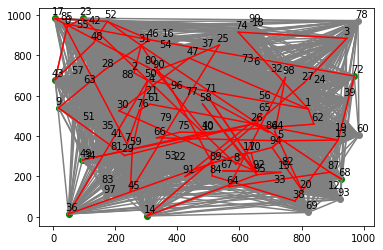

In [ ]:
complete_path = get_complete_path(solution, all_paths)
print(complete_path)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)


In [ ]:
from collections import deque
import statistics
import numpy as np


temp_min_depart = 1000
temp_max_depart = 1050
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement
nb_iterations=10000 #Dans la boucle while de la boucle principale
nb_test = 1

# on affiche la barre de progression
nb_steps_bar =\
    (temp_max_depart-temp_min_depart)*nb_test #SOLUTION
bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
display(bar)

# pour stocker les résultats
moyennes   = []
deviations = []

random.seed(a=3)

# cette fois on boucle sur la taille de la liste tabou
for temp in range(temp_min_depart, temp_max_depart):            #SOLUTION
    bornes = deque(())                                       #SOLUTION
    for _ in range(nb_test):                                #SOLUTION
        # génération aléatoire de l'instance et calcul de   #SOLUTION
        # sa borne supérieure.                              #SOLUTION
        borne = pulp.value(model.objective)                          #SOLUTION
                                                           #SOLUTION
        solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path,temp)  #SOLUTION
        bar.value += 1                                      #SOLUTION
        distance = distance*100/borne                            #SOLUTION
        bornes.append(distance)                             #SOLUTION
                                                            #SOLUTION
    # en fait, pour la moyenne, le calcul manuel reste      #SOLUTION
    # l'implémentation la plus rapide                       #SOLUTION
    moyennes.append(statistics.fmean(bornes))               #SOLUTION
    deviations.append(np.std(bornes))                       #SOLUTION

# on cache la barre de progression
bar.close()

# affichage de la courbe de moyenne
plt.plot(range(temp_min_depart, temp_max_depart), moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(temp_min_depart, temp_max_depart),
                 np.subtract(moyennes, deviations), # borne haute
                 np.add(moyennes, deviations),      # borne basse
                 alpha=.1)                          # transparence
plt.xlabel("taille de la liste tabou")
plt.ylabel("distance à la borne")
plt.title("Impact de la taille de la liste tabou sur la qualité des solutions")
plt.show()

IntProgress(value=0, layout=Layout(width='100%'), max=50)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

IntProgress(value=0, layout=Layout(width='100%'), max=10000)

KeyboardInterrupt: 

In [ ]:
plt.hist(bornes, edgecolor = "black")                         #SOLUTION
plt.xlabel("distance à la borne")                             #SOLUTION
plt.ylabel("nombre d'intances")                               #SOLUTION
plt.title("Distribution des distances à la borne supérieure") #SOLUTION

NameError: name 'plt' is not defined

Au bout de  10000 itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :
36 ->
16 ->
20 ->
31 ->
40 ->
23 ->
24 ->
8 ->
12 ->
15 ->
13 ->
27 ->
7 ->
34 ->
39 ->
30 ->
44 ->
26 ->
38 ->
9 ->
29 ->
45 ->
32 ->
5 ->
6 ->
3 ->
47 ->
48 ->
2 ->
4 ->
14 ->
25 ->
37 ->
46 ->
0 ->
43 ->
11 ->
33 ->
28 ->
17 ->
49 ->
41 ->
42 ->
10 ->
18 ->
22 ->
19 ->
35 ->
21 ->
1 ->
36 ->
La distance parcourue de la 1ere liste était de  26323.3261403117 min.
La distance parcourue au total est de  25078.55952507626 min.


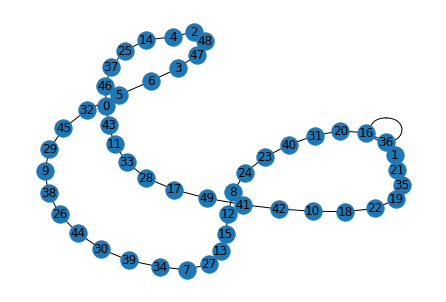

In [ ]:
def afficher_villes(liste):
    for i in range(0,len(liste)):
        print(liste[i],"->")

print ("Au bout de ",nb_iterations,"itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :")
afficher_villes(solution)

print("La distance parcourue de la 1ere liste était de ", distance_tot(complete_graph,path), "min.")
print("La distance parcourue au total est de ", distance_tot(complete_graph,solution), "min.") 

tab_path_real = get_complete_path(solution, all_paths)

G = nx.Graph()
G.add_nodes_from(solution)
for i in range(len(solution)):
    G.add_edge(solution[i],solution[(i+1)%len(solution)])


nx.draw(G, with_labels=True)

10000
10000
10000


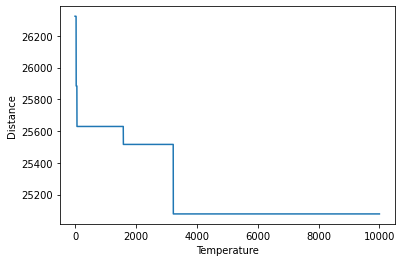

In [ ]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot


print(len(i_tab))
print(len(T_tab))
print(len(distance_tab))

# plot T_tab vs distance_tab
pyplot.plot(distance_tab)


pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()